In [5]:
# 1. Importar librerías
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
import plotly.graph_objects as go
from collections import Counter
from matplotlib.colors import Normalize
from scipy.stats import linregress

In [20]:
# Configuración inicial
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Carga y preparación de datos
df = pd.read_csv('techd-escalalibre.csv')
G = nx.from_pandas_edgelist(df, 'Origen', 'Destino', edge_attr='Peso', create_using=nx.DiGraph())

# 3. Análisis básico del grafo
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")
print(f"Densidad de la red: {nx.density(G):.4f}")

Número de nodos: 50
Número de aristas: 2413
Densidad de la red: 0.9849


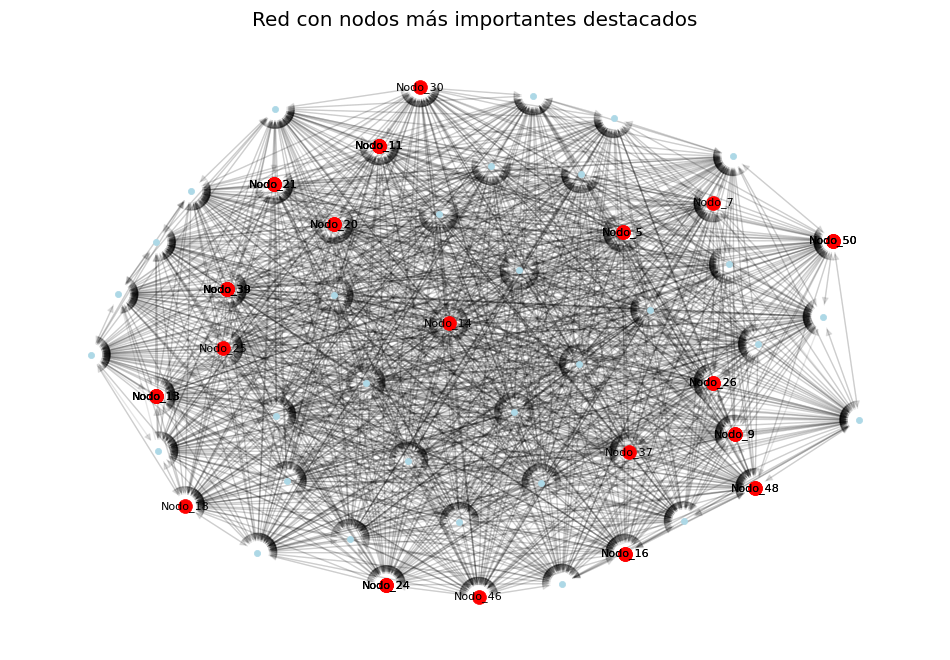


Resumen del análisis:
- La red tiene 50 nodos y 2413 conexiones.
- Los nodos más importantes según diferentes métricas son:
  Por Grado: Nodo_11, Nodo_13, Nodo_5, Nodo_39, Nodo_20
  Por In-Degree: Nodo_30, Nodo_13, Nodo_7, Nodo_14, Nodo_24
  Por Out-Degree: Nodo_48, Nodo_13, Nodo_46, Nodo_25, Nodo_18
  Por Centralidad de Grado: Nodo_11, Nodo_13, Nodo_5, Nodo_39, Nodo_20
  Por Centralidad de Intermediación: Nodo_11, Nodo_16, Nodo_9, Nodo_50, Nodo_37
  Por Centralidad de Cercanía: Nodo_11, Nodo_9, Nodo_48, Nodo_21, Nodo_16
  Por Centralidad de Vector Propio: Nodo_21, Nodo_24, Nodo_50, Nodo_26, Nodo_39
  Por PageRank: Nodo_21, Nodo_24, Nodo_50, Nodo_26, Nodo_39

Detectadas comunidades en la red.


In [21]:
# 4. Cálculo de métricas de centralidad

# Centralidad de grado
degree_centrality = nx.degree_centrality(G)

# Centralidad de intermediación
betweenness_centrality = nx.betweenness_centrality(G, weight='Peso')

# Centralidad de cercanía
closeness_centrality = nx.closeness_centrality(G, distance='Peso')

# Centralidad de vector propio
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, weight='Peso')
except nx.PowerIterationFailedConvergence:
    eigenvector_centrality = {n: 0 for n in G.nodes()}

# Grado de entrada y salida
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# PageRank
pagerank = nx.pagerank(G, weight='Peso')

# 5. Crear un DataFrame con todos los resultados
centrality_df = pd.DataFrame({
    'Nodo': list(G.nodes()),
    'Grado': [G.degree(n) for n in G.nodes()],
    'In_Degree': pd.Series(in_degree),
    'Out_Degree': pd.Series(out_degree),
    'Centralidad_Grado': pd.Series(degree_centrality),
    'Centralidad_Intermediacion': pd.Series(betweenness_centrality),
    'Centralidad_Cercania': pd.Series(closeness_centrality),
    'Centralidad_Vector_Propio': pd.Series(eigenvector_centrality),
    'PageRank': pd.Series(pagerank)
})

# 6. Identificar los nodos más importantes según cada métrica
top_nodes = {
    'Por Grado': centrality_df.sort_values('Grado', ascending=False)['Nodo'].head(5).tolist(),
    'Por In-Degree': centrality_df.sort_values('In_Degree', ascending=False)['Nodo'].head(5).tolist(),
    'Por Out-Degree': centrality_df.sort_values('Out_Degree', ascending=False)['Nodo'].head(5).tolist(),
    'Por Centralidad de Grado': centrality_df.sort_values('Centralidad_Grado', ascending=False)['Nodo'].head(5).tolist(),
    'Por Centralidad de Intermediación': centrality_df.sort_values('Centralidad_Intermediacion', ascending=False)['Nodo'].head(5).tolist(),
    'Por Centralidad de Cercanía': centrality_df.sort_values('Centralidad_Cercania', ascending=False)['Nodo'].head(5).tolist(),
    'Por Centralidad de Vector Propio': centrality_df.sort_values('Centralidad_Vector_Propio', ascending=False)['Nodo'].head(5).tolist(),
    'Por PageRank': centrality_df.sort_values('PageRank', ascending=False)['Nodo'].head(5).tolist()
}

# 7. Visualización de los nodos más importantes
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Dibujar todos los nodos y aristas
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.1)

# Resaltar los nodos más importantes (solo los más destacados de cada métrica)
for metric, nodes in top_nodes.items():
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=100, node_color='red')
    nx.draw_networkx_labels(G, pos, labels={n: n for n in nodes}, font_size=8)

plt.title("Red con nodos más importantes destacados")
plt.axis('off')
plt.show()

# 8. Resultados del análisis
print("\nResumen del análisis:")
print(f"- La red tiene {G.number_of_nodes()} nodos y {G.number_of_edges()} conexiones.")
print("- Los nodos más importantes según diferentes métricas son:")
for metric, nodes in top_nodes.items():
    print(f"  {metric}: {', '.join(nodes)}")

# 9. Análisis de comunidades (si la red es lo suficientemente grande)
if G.number_of_nodes() > 10:
    try:
        from community import community_louvain
        partition = community_louvain.best_partition(G.to_undirected())
        print("\nDetectadas comunidades en la red.")
    except:
        print("\nNo se pudo realizar análisis de comunidades (requiere instalación de python-louvain).")


c:\Users\josel\Code\UPC_DS_Master\ciclo02\redescomplejas\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


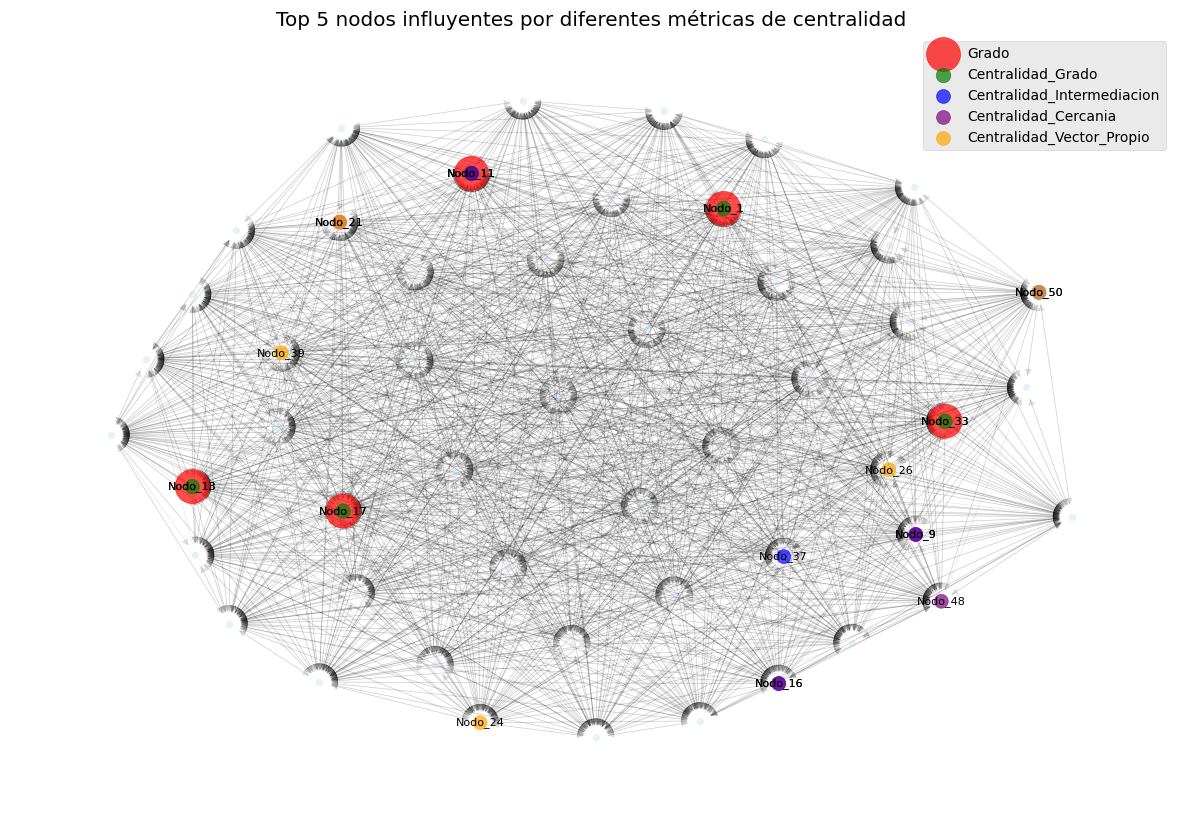


Interpretación de las métricas de centralidad:
1. Centralidad de Grado: Mide conexiones directas. Nodos con alto grado son 'hubs'.
2. Centralidad de Intermediación: Identifica 'puentes'. Nodos que conectan comunidades.
3. Centralidad de Cercanía: Mide accesibilidad. Nodos que pueden alcanzar rápidamente a otros.
4. Centralidad de Vector Propio: Mide influencia. Nodos conectados a otros nodos importantes.

Top nodos por cada métrica:

Grado:
   Nodo  Grado
Nodo_13     98
Nodo_11     98
Nodo_17     98

Centralidad_Grado:
   Nodo  Centralidad_Grado
Nodo_13                2.0
Nodo_11                2.0
Nodo_17                2.0

Centralidad_Intermediacion:
   Nodo  Centralidad_Intermediacion
Nodo_11                    0.177509
Nodo_16                    0.158163
 Nodo_9                    0.149022

Centralidad_Cercania:
   Nodo  Centralidad_Cercania
Nodo_11              0.015776
 Nodo_9              0.014311
Nodo_48              0.014294

Centralidad_Vector_Propio:
   Nodo  Centralidad_V

In [18]:
def calcular_metricas_centralidad(grafo):
    """
    Calcula las principales métricas de centralidad para un grafo
    y devuelve un DataFrame con los resultados
    """
    # 1. Centralidad de Grado (Degree Centrality)
    degree_centrality = nx.degree_centrality(grafo)
    
    # 2. Centralidad de Intermediación (Betweenness Centrality)
    betweenness_centrality = nx.betweenness_centrality(grafo, weight='Peso')
    
    # 3. Centralidad de Cercanía (Closeness Centrality)
    closeness_centrality = nx.closeness_centrality(grafo, distance='Peso')
    
    # 4. Centralidad de Vector Propio (Eigenvector Centrality)
    try:
        eigenvector_centrality = nx.eigenvector_centrality(grafo, weight='Peso', max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        eigenvector_centrality = {n: 0 for n in grafo.nodes()}
        print("Advertencia: No convergió el cálculo de vector propio. Se asignaron ceros.")
    
    # Crear DataFrame con los resultados
    metrics_df = pd.DataFrame({
        'Nodo': list(degree_centrality.keys()),
        'Grado': [grafo.degree(n) for n in grafo.nodes()],
        'Centralidad_Grado': list(degree_centrality.values()),
        'Centralidad_Intermediacion': list(betweenness_centrality.values()),
        'Centralidad_Cercania': list(closeness_centrality.values()),
        'Centralidad_Vector_Propio': list(eigenvector_centrality.values())
    })
    
    return metrics_df

def visualizar_top_nodos(grafo, metrics_df, top_n=5):
    """
    Visualiza los nodos más importantes según cada métrica
    """
    plt.figure(figsize=(15, 10))
    pos = nx.spring_layout(grafo, seed=42)
    
    # Normalizar métricas para el tamaño de los nodos
    norm = Normalize(vmin=metrics_df.iloc[:, 1:].min().min(), 
                    vmax=metrics_df.iloc[:, 1:].max().max())
    
    # Dibujar toda la red
    nx.draw_networkx_nodes(grafo, pos, node_size=20, node_color='lightblue', alpha=0.3)
    nx.draw_networkx_edges(grafo, pos, alpha=0.1, width=0.5)
    
    # Dibujar nodos importantes para cada métrica
    metrics = metrics_df.columns[1:]
    colors = ['red', 'green', 'blue', 'purple', 'orange']
    
    for i, metric in enumerate(metrics):
        top_nodes = metrics_df.nlargest(top_n, metric)['Nodo'].values
        sizes = 100 + 500 * norm(metrics_df[metrics_df['Nodo'].isin(top_nodes)][metric])
        nx.draw_networkx_nodes(grafo, pos, nodelist=top_nodes, 
                                node_size=sizes, node_color=colors[i], 
                                alpha=0.7, label=metric)
        nx.draw_networkx_labels(grafo, pos, labels={n: n for n in top_nodes}, 
                                font_size=8, font_color='black')
    
    plt.title(f"Top {top_n} nodos influyentes por diferentes métricas de centralidad")
    plt.legend()
    plt.axis('off')
    plt.show()

def interpretar_metricas(metrics_df):
    """
    Proporciona una interpretación de las métricas calculadas
    """
    print("\nInterpretación de las métricas de centralidad:")
    print("1. Centralidad de Grado: Mide conexiones directas. Nodos con alto grado son 'hubs'.")
    print("2. Centralidad de Intermediación: Identifica 'puentes'. Nodos que conectan comunidades.")
    print("3. Centralidad de Cercanía: Mide accesibilidad. Nodos que pueden alcanzar rápidamente a otros.")
    print("4. Centralidad de Vector Propio: Mide influencia. Nodos conectados a otros nodos importantes.")
    
    print("\nTop nodos por cada métrica:")
    for metric in metrics_df.columns[1:]:
        top = metrics_df.nlargest(3, metric)[['Nodo', metric]]
        print(f"\n{metric}:")
        print(top.to_string(index=False))

# Ejemplo de uso con tu grafo G
# Asumiendo que G es tu grafo ya creado
metrics_df = calcular_metricas_centralidad(G)
visualizar_top_nodos(G, metrics_df)
interpretar_metricas(metrics_df)

# Mostrar tabla completa de métricas
print("\nTabla completa de métricas de centralidad:")
print(metrics_df.sort_values('Centralidad_Grado', ascending=False).head(10).to_string(index=False))

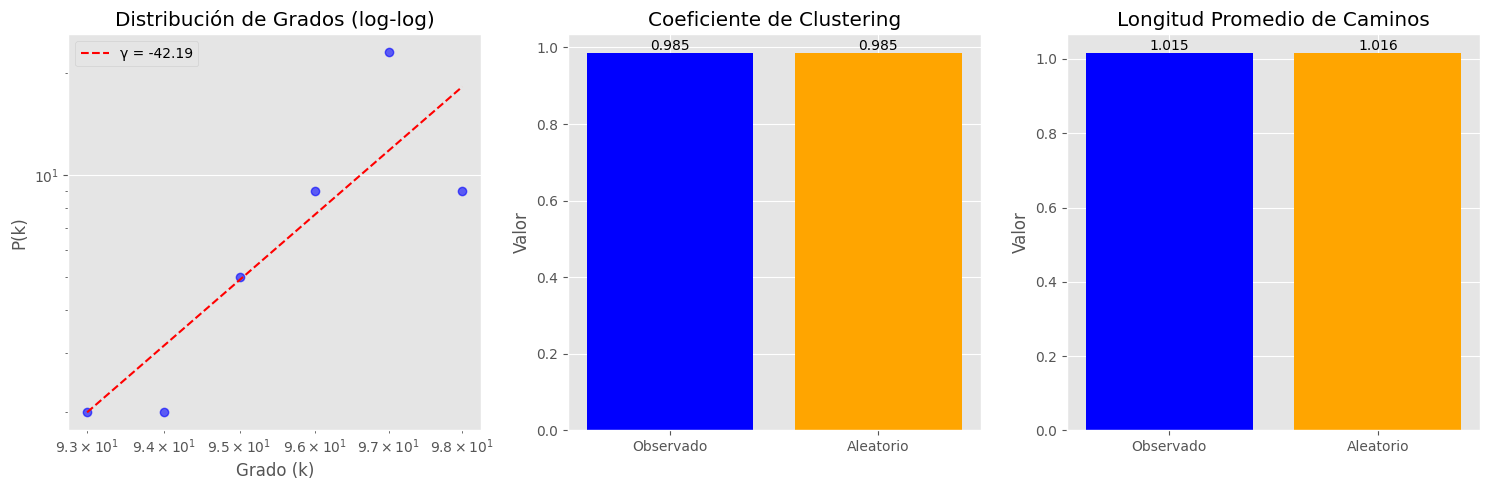


=== CONCLUSIONES DEL ANÁLISIS ===

1. PROPIEDAD DE ESCALA LIBRE:
- Exponente γ de la distribución: -42.192
- Ajuste (R²): 0.747
- CONCLUSIÓN: La red SIGUE una distribución de ley de potencia (escala libre)
  * Existen hubs (nodos altamente conectados)
  * La red es robusta a fallos aleatorios pero vulnerable a ataques dirigidos

2. PROPIEDAD DE PEQUEÑO MUNDO:
- Clustering observado: 0.985
- Clustering en red aleatoria: 0.985
- Path length observado: 1.015
- Path length en red aleatoria: 1.016
- CONCLUSIÓN: La red tiene PROPIEDADES DE PEQUEÑO MUNDO
  * Alta agrupación local (clustering)
  * Corta distancia promedio entre nodos
  * La información puede fluir eficientemente a través de la red


In [19]:
def analizar_propiedades_red(grafo):
    """
    Analiza si la red cumple con propiedades de escala libre y pequeño mundo
    Devuelve resultados y gráficos relevantes
    """
    resultados = {}
    
    # 1. Análisis de Escala Libre (Distribución de Grados)
    degrees = [d for _, d in grafo.degree()]
    degree_counts = Counter(degrees)
    k, pk = zip(*sorted(degree_counts.items()))
    
    # Ajuste a ley de potencia (log-log)
    log_k = np.log(k)
    log_pk = np.log(pk)
    slope, intercept, r_value, _, _ = linregress(log_k, log_pk)
    
    resultados['escala_libre'] = {
        'exponente': -slope,
        'r_cuadrado': r_value**2,
        'cumple_escala_libre': r_value**2 > 0.7  # Umbral empírico
    }
    
    # 2. Análisis de Pequeño Mundo
    # Coeficiente de clustering promedio
    clustering = nx.average_clustering(grafo)
    
    # Longitud promedio de caminos (para componente conexa más grande)
    largest_cc = max(nx.connected_components(grafo.to_undirected()), key=len)
    subgrafo = grafo.subgraph(largest_cc)
    avg_path_length = nx.average_shortest_path_length(subgrafo)
    
    # Red aleatoria equivalente para comparación
    n = len(largest_cc)
    p = nx.density(subgrafo)
    random_graph = nx.erdos_renyi_graph(n, p)
    random_clustering = nx.average_clustering(random_graph)
    random_path_length = nx.average_shortest_path_length(random_graph)
    
    resultados['pequeno_mundo'] = {
        'clustering_observado': clustering,
        'clustering_aleatorio': random_clustering,
        'path_length_observado': avg_path_length,
        'path_length_aleatorio': random_path_length,
        'cumple_pequeno_mundo': (clustering > random_clustering) and 
                               (avg_path_length <= random_path_length * 1.5)
    }
    
    return resultados, (k, pk)

def graficar_resultados(resultados, k, pk):
    """
    Genera visualizaciones para los análisis realizados
    """
    plt.figure(figsize=(15, 5))
    
    # Gráfico 1: Distribución de grados (log-log)
    plt.subplot(131)
    plt.loglog(k, pk, 'bo', alpha=0.6)
    plt.title('Distribución de Grados (log-log)')
    plt.xlabel('Grado (k)')
    plt.ylabel('P(k)')
    
    if resultados['escala_libre']['r_cuadrado'] > 0.7:
        x_vals = np.array([min(k), max(k)])
        y_vals = np.exp(resultados['escala_libre']['exponente'] * -np.log(x_vals) + 
                       np.log(pk[0]) - resultados['escala_libre']['exponente'] * -np.log(k[0]))
        plt.loglog(x_vals, y_vals, 'r--', label=f"γ = {resultados['escala_libre']['exponente']:.2f}")
        plt.legend()
    
    # Gráfico 2: Comparación de clustering
    plt.subplot(132)
    bars = plt.bar(['Observado', 'Aleatorio'], 
                    [resultados['pequeno_mundo']['clustering_observado'], 
                    resultados['pequeno_mundo']['clustering_aleatorio']],
                    color=['blue', 'orange'])
    plt.title('Coeficiente de Clustering')
    plt.ylabel('Valor')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom')
    
    # Gráfico 3: Comparación de longitudes de camino
    plt.subplot(133)
    bars = plt.bar(['Observado', 'Aleatorio'], 
                    [resultados['pequeno_mundo']['path_length_observado'], 
                    resultados['pequeno_mundo']['path_length_aleatorio']],
                    color=['blue', 'orange'])
    plt.title('Longitud Promedio de Caminos')
    plt.ylabel('Valor')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def imprimir_conclusiones(resultados):
    """
    Imprime conclusiones interpretables del análisis
    """
    print("\n=== CONCLUSIONES DEL ANÁLISIS ===")
    
    # Conclusiones sobre escala libre
    esc = resultados['escala_libre']
    print("\n1. PROPIEDAD DE ESCALA LIBRE:")
    print(f"- Exponente γ de la distribución: {esc['exponente']:.3f}")
    print(f"- Ajuste (R²): {esc['r_cuadrado']:.3f}")
    
    if esc['cumple_escala_libre']:
        print("- CONCLUSIÓN: La red SIGUE una distribución de ley de potencia (escala libre)")
        print("  * Existen hubs (nodos altamente conectados)")
        print("  * La red es robusta a fallos aleatorios pero vulnerable a ataques dirigidos")
    else:
        print("- CONCLUSIÓN: La red NO SIGUE claramente una distribución de ley de potencia")
    
    # Conclusiones sobre pequeño mundo
    pm = resultados['pequeno_mundo']
    print("\n2. PROPIEDAD DE PEQUEÑO MUNDO:")
    print(f"- Clustering observado: {pm['clustering_observado']:.3f}")
    print(f"- Clustering en red aleatoria: {pm['clustering_aleatorio']:.3f}")
    print(f"- Path length observado: {pm['path_length_observado']:.3f}")
    print(f"- Path length en red aleatoria: {pm['path_length_aleatorio']:.3f}")
    
    if pm['cumple_pequeno_mundo']:
        print("- CONCLUSIÓN: La red tiene PROPIEDADES DE PEQUEÑO MUNDO")
        print("  * Alta agrupación local (clustering)")
        print("  * Corta distancia promedio entre nodos")
        print("  * La información puede fluir eficientemente a través de la red")
    else:
        print("- CONCLUSIÓN: La red NO muestra claramente propiedades de pequeño mundo")

# Ejemplo de uso con tu grafo G
resultados, (k, pk) = analizar_propiedades_red(G)
graficar_resultados(resultados, k, pk)
imprimir_conclusiones(resultados)